<a href="https://colab.research.google.com/github/rohanguptha/INFO5731/blob/master/Geomap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point, Polygon
%matplotlib inline

In [0]:
street_map = gdp.read_file('tl_2015_48_prisecroads.shp')

In [0]:
!pip install descartes

In [0]:
import descartes

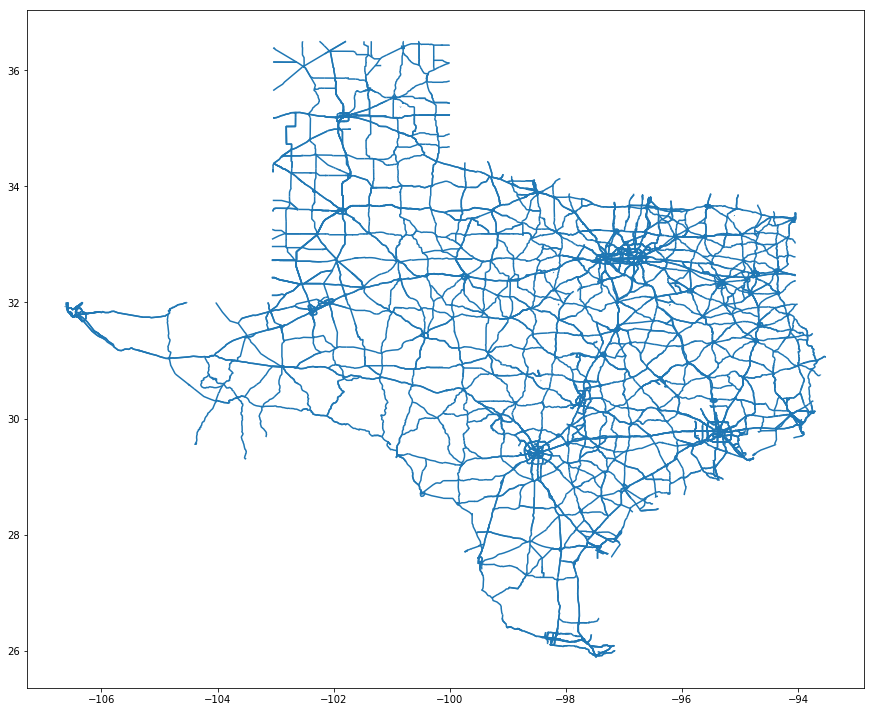

In [0]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax=ax)

In [0]:
import pickle
import numpy as np 
import pandas as pd 

In [0]:
df = pd.read_pickle('time_converted_df.pickle')
crs = {'init':'epsg:4326'}
df.head()

,EVENT_ID,EVENT_STATE,EVENT_CLASS,EVENT_TYPE,FACILITY_NAME,DIRECTION,ARTICLE_CODE,FROM_LOC_POINT,TO_LOC_POINT,CREATE_TIME,...,LAT,LON,TO_LAT,TO_LON,START_DATE,END_DATE,INCIDENT_IMPACT,UPDATE_NUMBER,WAZE_EVENT_ID,time
0,'2018110100002600005075',closed,incident,minor accident,I-30 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:00:26 AM,...,32.791163,-96.749703,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:00:26
1,'2018110100181100005075',closed,incident,other,I-35E S,Southbound,NaN,NaN,NaN,11/1/2018 12:18:11 AM,...,32.559553,-96.822538,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:18:11
2,'2018110100210000005075',closed,incident,road closed,Warren Pkwy,Northbound,NaN,NaN,NaN,11/1/2018 12:21:00 AM,...,33.109015,-96.802718,0,0,NaN,NaN,NaN,1,NaN,2018-11-01 00:21:00
3,'2018110100222500005075',closed,incident,stopped car on the shoulder,I-820 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:22:25 AM,...,32.839193,-97.294523,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:22:25
4,'2018110100234000005075',closed,incident,traffic jam,Warren Pkwy,NaN,NaN,NaN,Ohio Dr,11/1/2018 12:23:40 AM,...,33.109015,-96.802718,33.109003,-96.80129,NaN,NaN,NaN,0,NaN,2018-11-01 00:23:40


In [0]:
df.LAT = df.LAT.astype(float)

In [0]:
df.LON = df.LON.astype(float)

In [0]:
geometry = [Point(xy) for xy in zip(df['LON'], df['LAT'])]
geometry[:3]

In [0]:
geo_df = gdp.GeoDataFrame(df,
                          crs = crs,
                          geometry = geometry)
geo_df.head()

,EVENT_ID,EVENT_STATE,EVENT_CLASS,EVENT_TYPE,FACILITY_NAME,DIRECTION,ARTICLE_CODE,FROM_LOC_POINT,TO_LOC_POINT,CREATE_TIME,...,LON,TO_LAT,TO_LON,START_DATE,END_DATE,INCIDENT_IMPACT,UPDATE_NUMBER,WAZE_EVENT_ID,time,geometry
0,'2018110100002600005075',closed,incident,minor accident,I-30 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:00:26 AM,...,-96.749703,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:00:26,POINT (-96.749703 32.791163)
1,'2018110100181100005075',closed,incident,other,I-35E S,Southbound,NaN,NaN,NaN,11/1/2018 12:18:11 AM,...,-96.822538,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:18:11,POINT (-96.82253799999999 32.559553)
2,'2018110100210000005075',closed,incident,road closed,Warren Pkwy,Northbound,NaN,NaN,NaN,11/1/2018 12:21:00 AM,...,-96.802718,0,0,NaN,NaN,NaN,1,NaN,2018-11-01 00:21:00,POINT (-96.802718 33.109015)
3,'2018110100222500005075',closed,incident,stopped car on the shoulder,I-820 E,Eastbound,NaN,NaN,NaN,11/1/2018 12:22:25 AM,...,-97.294523,0,0,NaN,NaN,NaN,0,NaN,2018-11-01 00:22:25,POINT (-97.294523 32.839193)
4,'2018110100234000005075',closed,incident,traffic jam,Warren Pkwy,NaN,NaN,NaN,Ohio Dr,11/1/2018 12:23:40 AM,...,-96.802718,33.109003,-96.80129,NaN,NaN,NaN,0,NaN,2018-11-01 00:23:40,POINT (-96.802718 33.109015)


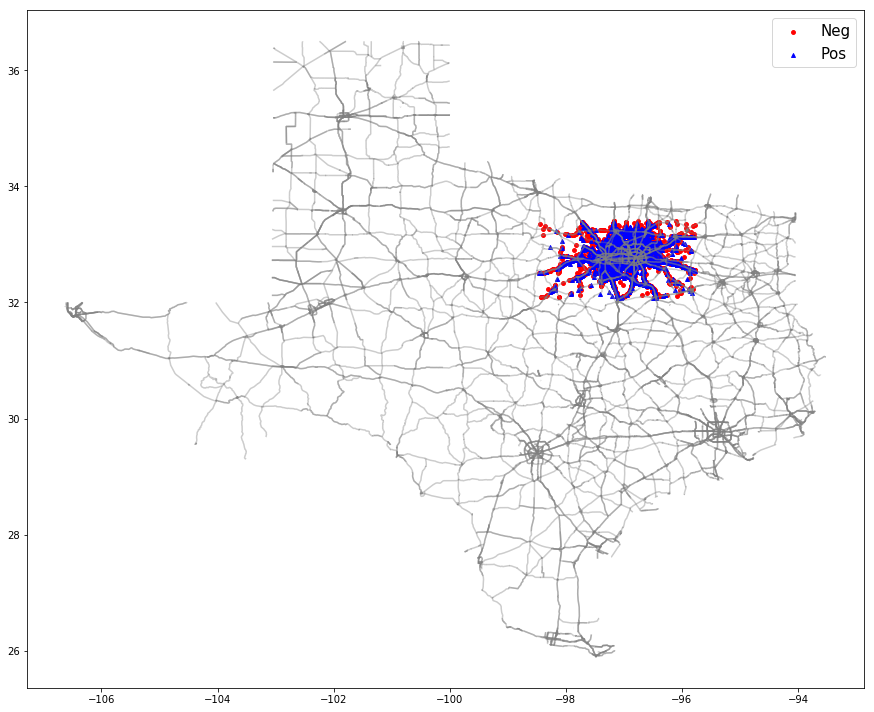

In [0]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df[geo_df['EVENT_TYPE'] == 'accident'].plot(ax=ax, markersize=15, color="red",marker='o', label="Neg" )
geo_df[geo_df['EVENT_TYPE'] == 'minor accident'].plot(ax=ax, markersize=15, color="blue", marker='^', label="Pos" )
plt.legend(prop={'size':15})